In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv ('IRIS[1].csv')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 5)

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
count =  data.species.value_counts()
print(count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [13]:
lab = data.species.unique().tolist()
lab

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

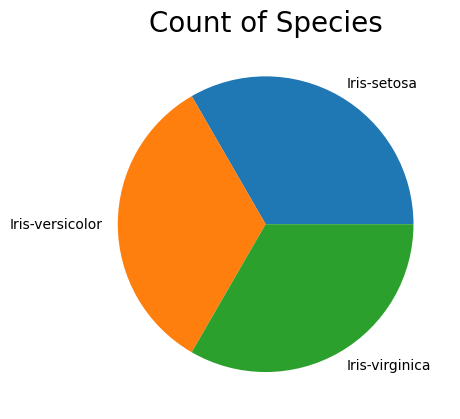

In [14]:
plt.pie(count,labels=lab)
plt.title("Count of Species",fontsize=20)
plt.show()

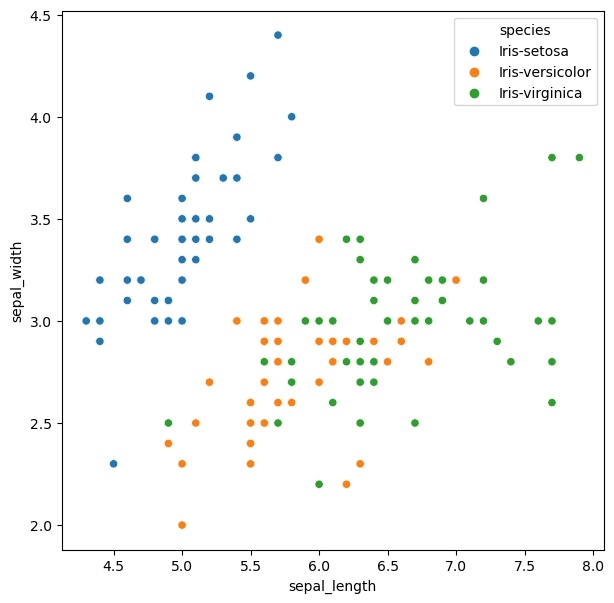

In [20]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="sepal_length",y="sepal_width",data=data,hue="species")
plt.show()

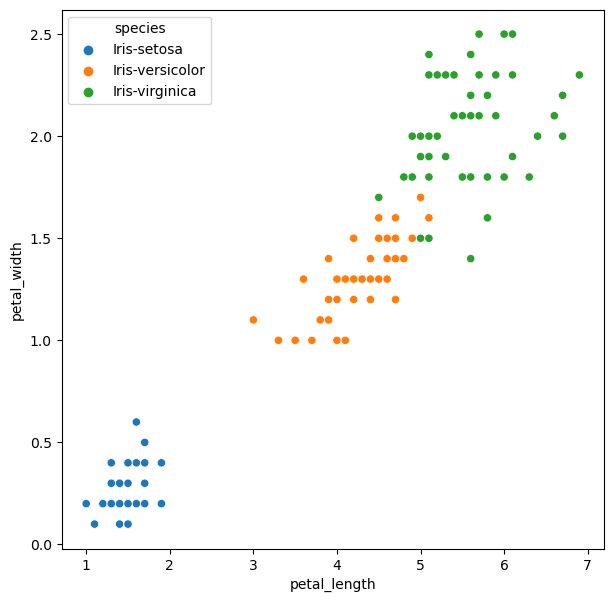

In [21]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x="petal_length",y="petal_width",data=data,hue="species")
plt.show()

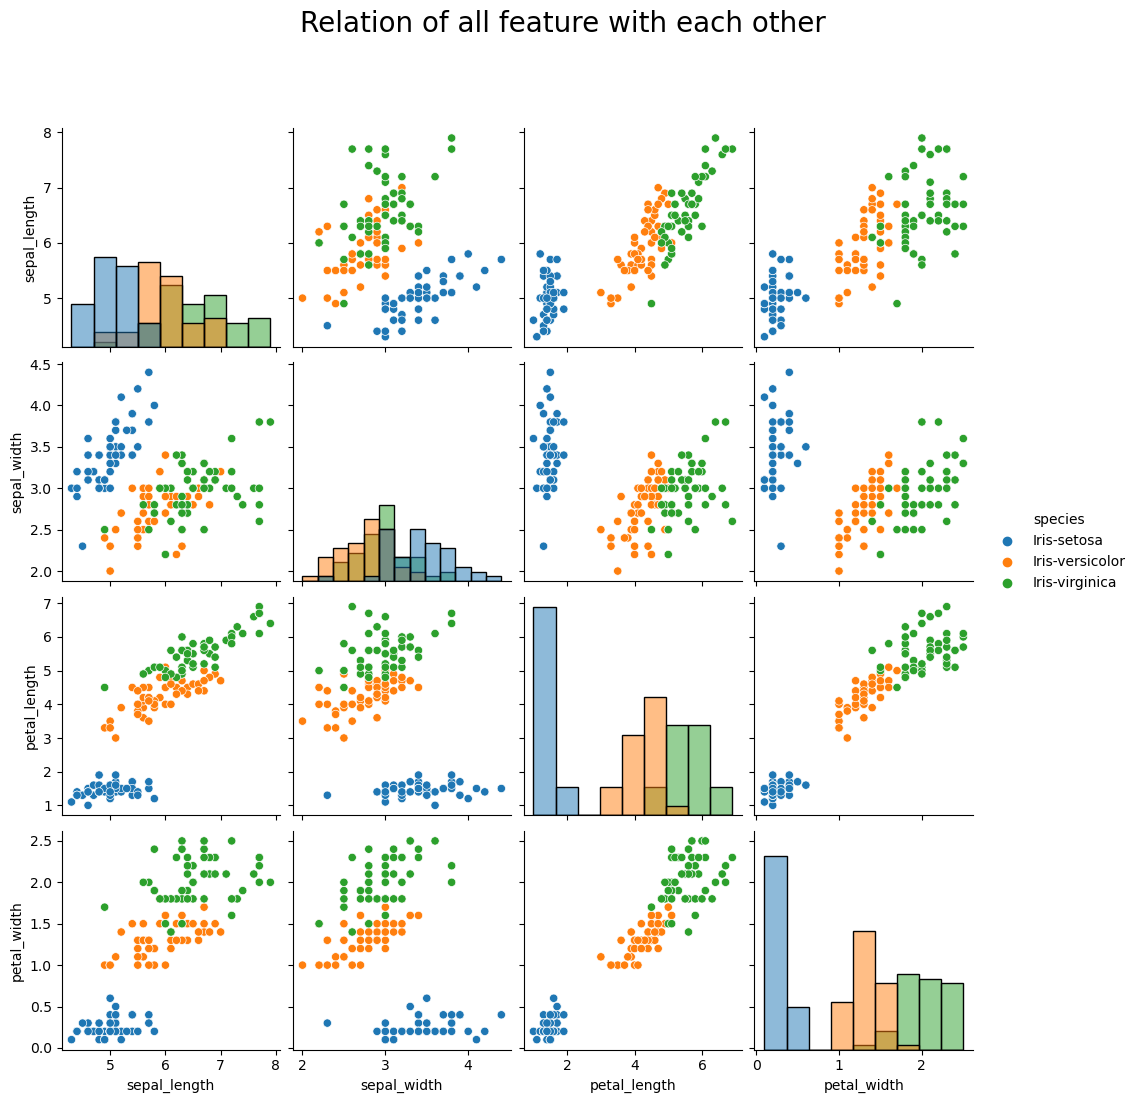

In [27]:
plot=sns.pairplot(data,hue="species",diag_kind="hist")
plot.fig.suptitle("Relation of all feature with each other",y=1.1,fontsize=20)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop(["species"],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
Y = data["species"]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [33]:
model = LogisticRegression(max_iter=1000)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))
print("Confusion Matrix\n",confusion_matrix(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [36]:
#The accuracy of the model 
print(accuracy_score(y_test,predictions))

0.9777777777777777
